In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

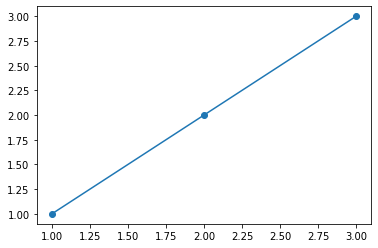

In [5]:
plt.scatter(x_train, y_train)
xs = np.linspace(1,3,1000)
plt.plot(xs, xs)

In [6]:
W_I = np.linspace(-5, 7, 1000)
cost_I = []
for W in W_I:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    cost_I.append(cost.item())

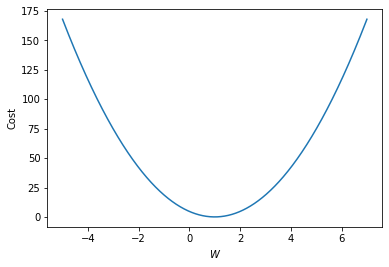

In [8]:
plt.plot(W_I, cost_I)
plt.xlabel("$W$")
plt.ylabel("Cost")
plt.show()

In [9]:
W = 0

In [10]:
gradient = torch.sum((W * x_train - y_train) * x_train)
print(gradient)

tensor(-14.)


In [12]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(1.4000)


### Training

In [14]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
W = torch.zeros(1)
lr = 0.1

nb_epochs = 10

for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    
    print("Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}".format(epoch, nb_epochs, W.item(), cost.item()))
    
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


### training with optim

In [16]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
W = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W], lr = 0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W
    cost = torch.mean((hypothesis - y_train) ** 2)
    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000
